In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the uploaded dataset to inspect its structure
file_path = 'resources/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset to understand its structure and variables
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

In [2]:
# Check the distribution of the target variable
print(data['Diabetes_012'].value_counts())


Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


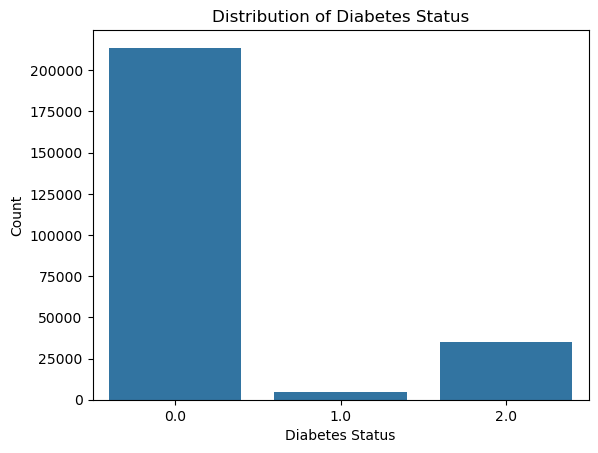

In [4]:
# Import matplotlib and seaborn if not already imported
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot
sns.countplot(x='Diabetes_012', data=data)
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()


In [5]:
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     42741
         1.0       0.03      0.04      0.03       926
         2.0       0.30      0.33      0.31      7069

    accuracy                           0.77     50736
   macro avg       0.40      0.41      0.40     50736
weighted avg       0.78      0.77      0.77     50736

[[36570   904  5267]
 [  668    35   223]
 [ 4479   292  2298]]


In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

# Split the dataset into training and testing sets, stratifying by target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes of the resulting datasets to confirm split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((202944, 21), (50736, 21), (202944,), (50736,))

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix


('              precision    recall  f1-score   support\n\n         0.0       0.88      0.86      0.87     42741\n         1.0       0.03      0.04      0.03       926\n         2.0       0.30      0.33      0.31      7069\n\n    accuracy                           0.77     50736\n   macro avg       0.40      0.41      0.40     50736\nweighted avg       0.78      0.77      0.77     50736\n',
 array([[36570,   904,  5267],
        [  668,    35,   223],
        [ 4479,   292,  2298]], dtype=int64))

In [11]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE for oversampling the minority classes
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the resampled target variable
y_train_resampled.value_counts()


Diabetes_012
0.0    170962
2.0    170962
1.0    170962
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_params


Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [13]:
y_pred = best_model.predict(X_test)


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.55      0.13      0.21      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.37      0.38     50736
weighted avg       0.80      0.85      0.80     50736

[[42063     0   678]
 [  859     0    67]
 [ 6155     0   914]]


c:\Users\ssarv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ssarv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ssarv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


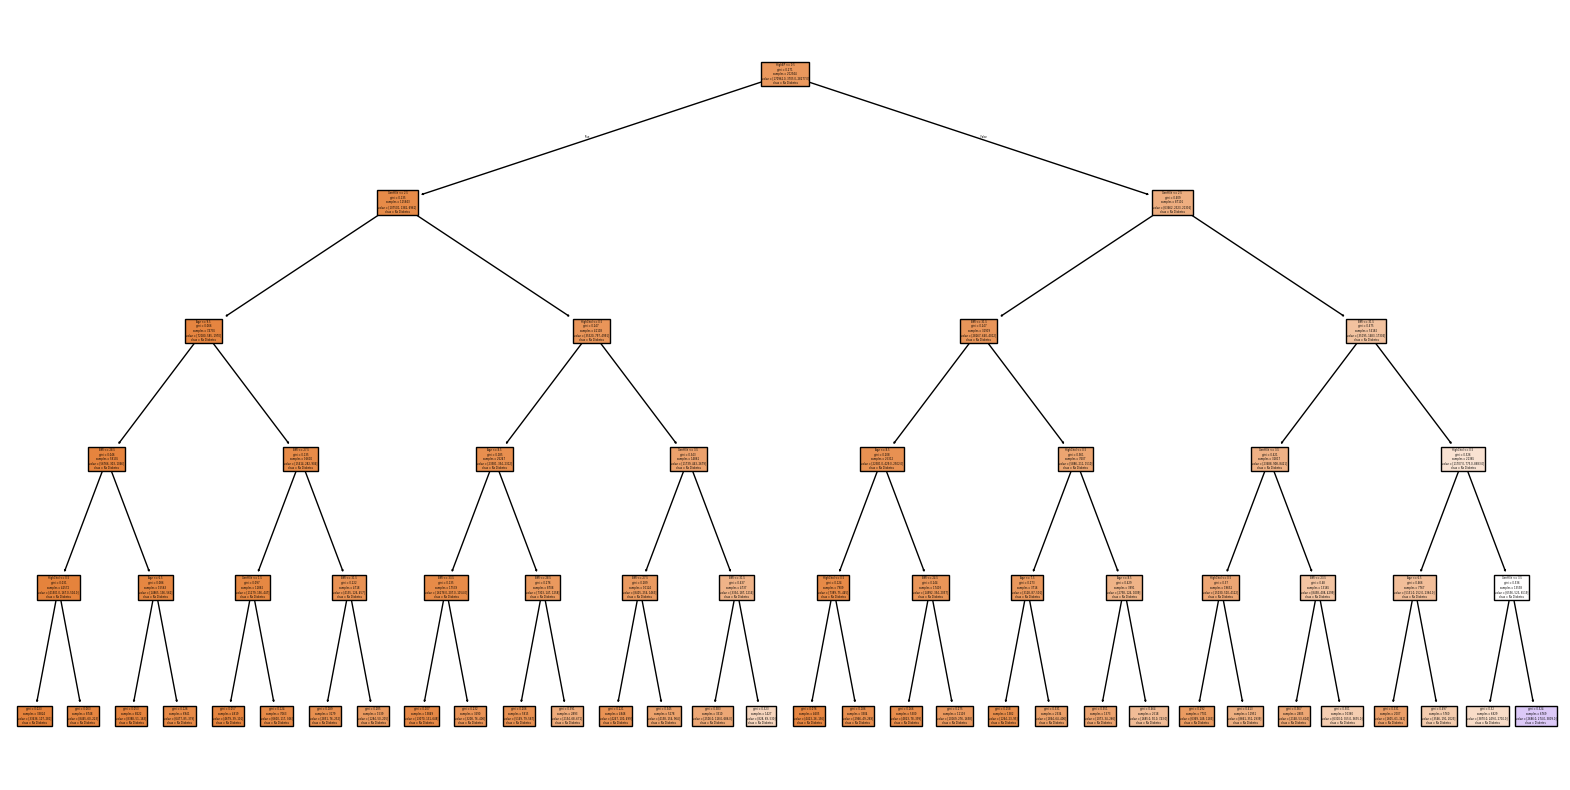

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['No Diabetes', 'Prediabetes', 'Diabetes'], filled=True)
plt.show()
